# RB & KM 3-2

## A. Membangun Model dengan Sequential API

In [ ]:
# Import Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Contoh 1:
# Memiliki 1 input layer dengan 8 neuron (menerima 8 input)
# Memiliki 1 hidden layer dengan 10 neuron
# Memiliki 1 output layer dengan 1 neuron

model11 = Sequential()
model11.add(Dense(10, input_shape=(8,)))
model11.add(Dense(1))

# model11.summary()

In [ ]:
# Contoh 1 (2):

model12 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(8,)),
    tf.keras.layers.Dense(1)
])

# model12.summary()

# model122 = Sequential([
#    Dense(10, input_shape=(8,)),
#    Dense(1)
# ])

# model122.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Contoh 2:
# Memiliki 1 input layer dengan 10 neuron (menerima 10 input)
# Memiliki 5 hidden layer
# Memiliki 1 output layer dengan 1 neuron

model2 = Sequential()
model2.add(Dense(100, input_shape=(10,))) # h1
model2.add(Dense(80)) # h2
model2.add(Dense(30)) # h3
model2.add(Dense(10)) # h4
model2.add(Dense(5)) # h5
model2.add(Dense(1))

# model2.summary()

## B. Membangun Model dengan Functional API

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras import Model

In [ ]:
# Contoh 3:
# Memiliki 1 input layer dengan 8 neuron (menerima 8 input)
# Memiliki 2 hidden layer
# Memiliki 1 output layer dengan 1 neuron

in_layer = Input(shape=(8,))
hid_layer1 = Dense(10)(in_layer)
hid_layer2 = Dense(5)(hid_layer1)
out_layer = Dense(1)(hid_layer2)

# Define Model
model3 = Model(inputs=in_layer, outputs=out_layer)
# model3.summary()

# Build Deep Learning Model

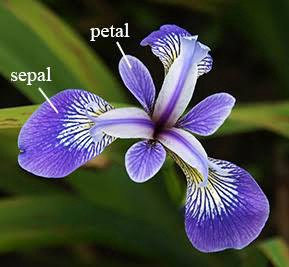

In [ ]:
from pandas import read_csv
from numpy import argmax # array get max (get posisi nilai terbesar dalam array)
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

## 1. Gathering Data

In [ ]:
url = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(url)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Preparing Data

### A. Pisahkan dataset menjadi feature (X) dan label (y)

In [ ]:
X = df.values[:, :-1]
y = df.values[:, -1]

# X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=object)

In [ ]:
X = X.astype('float32') # ubah tipe data dalam X menjadi float
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=float32)

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder # encode label nilai kategorik menjadi nilai numerik

y = LabelEncoder().fit_transform(y) # encode label menjadi nilai numerik
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### B. Split Data menjadi training dan testing dataset



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
# n_features = X_train.shape[1]
# print(n_features)

(120, 4) (30, 4) (120,) (30,)


## 3. Deep Learning Model Life-Cycle (DLMLC)

### A. Define the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# model.summary()

### B. Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['Recall']
)

### C. Fit the Model

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 150,
    verbose=2
)

### D. Evaluate the Model

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {acc}')

1/1 - 0s - loss: 0.2231 - accuracy: 1.0000
Test Accuracy: 1.0


### E. Make Prediction

In [ ]:
new_data = [5.1, 3.5, 1.4, 0.2]

y_pred = model.predict([new_data])

print(f'Predicted: {y_pred} (class = {argmax(y_pred)})')

Predicted: [[9.9919802e-01 3.4216573e-04 4.5973426e-04]] (class = 0)


# Visualize Deep Learning Model

## A. Model Text Description

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

# summarize the model
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_59 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_60 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_61 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_62 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 6         
Total params: 11,981
Trainable params: 11,981
Non-trainable params: 0
_________________________________________________

## B. Model Architecture Plot

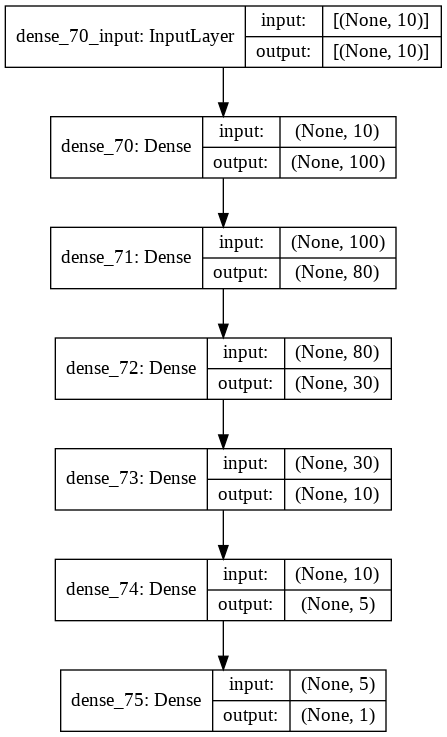

In [ ]:
from tensorflow.keras.utils import plot_model

# define model
model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

# summarize the model
plot_model(model, 'model.png', show_shapes=True)

# Plotting Learning Curve

In [ ]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', ))
# model.add(Dense(5, activation='relu', ))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model (simpan di hist)
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0,validation_split=0.3)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

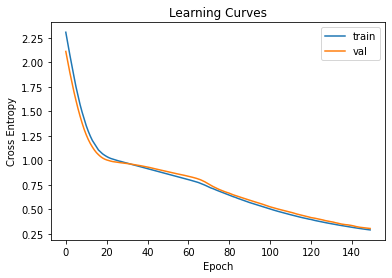

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# Save and Load Model

In [ ]:
# save model to file
model.save('model.h5') # Hierarchical Data Format 5

In [ ]:
from tensorflow.keras.models import load_model

# load the model from file
model = load_model('model.h5')

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[0.9130639  0.05133311 0.03560296]] (class=0)


# Deep Learning Techniques

## Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.add(Dropout(0.5))

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 100)               1100      
_________________________________________________________________
dense_102 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_103 (Dense)            (None, 30)                2430      
_________________________________________________________________
dense_104 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_105 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 6         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)               

## Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 100)               1100      
_________________________________________________________________
dense_108 (Dense)            (None, 80)                8080      
_________________________________________________________________
batch_normalization (BatchNo (None, 80)                320       
_________________________________________________________________
dense_109 (Dense)            (None, 30)                2430      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dense_110 (Dense)            (None, 10)                310       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)              

# Latihan

Bangun sebuah model DL untuk dataset berikut [ini](https://drive.google.com/file/d/1gnWGSTlr0QgJAyxUszEKvtRtCVR0qS6Y/view?usp=sharing).

Nilai latihan akan diambil dari accuracy model yang kamu bangun.